# Projeto de ciência de dados

## Pedro Lucas Rocha Almeida Santos

# Definição do problema

O problema central deste projeto reside na necessidade de prever, de forma precisa e eficiente, o tempo de parada de caminhões durante o carregamento de vasilhames de GLP, como P13, P20 e P45.
Atualmente, a variação no tempo de permanência pode resultar em ineficiências logísticas, atrasos e dificuldades no planejamento operacional.
Utilizar um algoritmo de regressão linear para modelar essa relação busca resolver essa questão, permitindo uma melhor gestão do tempo e otimização dos recursos no processo de carga dos caminhões.

# 1. Instalando as bibliotecas

In [33]:
pip install pandas odfpy # instala as bibliotecas panda e odfpy


# 2. Importando as bibliotecas

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 3. Importando os dados do Github para o código
Importando os dados  e definindos os cabeçalhos


In [35]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/PedroLucasRAS/projetos_cd/refs/heads/main/Dados-Projeto.csv"

# Informa o cabeçalho das colunas
colunas = ['Cliente', 'Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20', 'Intervalo de horas']

# Lê o arquivo utilizando as colunas informadas
data = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')


In [36]:
data.head()

,Cliente,Qtd de vasilhames P 13,Qtd P 45,Qtd P 20,Intervalo de horas
0,Cliente 1,152,44,0,0.572
1,Cliente 2,485,0,18,0.775
2,Cliente 3,320,24,9,0.685
3,Cliente 4,156,6,11,0.441
4,Cliente 5,121,8,23,0.476


# 4. Análise de dados

### 4.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.
Os dados de intervalo de tempo estão numérico sendo o resultado de: ((Valor)/60)/24.
Estes é o formato de número do excel para minutos

In [37]:
# Mostra as dimensões do dataset
print(data.shape)

(100, 5)


In [38]:
# Mostra as informações do dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente                 100 non-null    object 
 1   Qtd de vasilhames P 13  100 non-null    int64  
 2   Qtd P 45                100 non-null    int64  
 3   Qtd  P 20               100 non-null    int64  
 4   Intervalo de horas      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None


In [39]:
# Mostra as 10 primeiras linhas do dataset
data.head(10)

,Cliente,Qtd de vasilhames P 13,Qtd P 45,Qtd P 20,Intervalo de horas
0,Cliente 1,152,44,0,0.572
1,Cliente 2,485,0,18,0.775
2,Cliente 3,320,24,9,0.685
3,Cliente 4,156,6,11,0.441
4,Cliente 5,121,8,23,0.476
5,Cliente 6,750,23,14,1.135
6,Cliente 7,70,0,26,0.400
7,Cliente 8,664,43,21,1.184
8,Cliente 9,171,7,23,0.521
9,Cliente 10,516,23,8,0.871


# 5. Implementando e testando o algorítimo de regressão linear

In [40]:
# Selecionando as características e a variável alvo
X = data[['Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20']]
y = data['Intervalo de horas']

5.1 Preenchendo os valores faltantes, utilizado a média como dado

In [41]:
# Preencher valores faltantes (NaN) com a média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

5.2 Dividindo os dados em teste e treinamento

In [42]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5.3 Criando o modelo de regressão e treinando

In [43]:
# Crie e treine o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

5.4 Gráfico de resíduos e Avaliação do modelo

Mean Squared Error (MSE): 0.003326034289999974
Mean Absolute Error (MAE): 0.04555599999999986
R² Score: 0.9336902157841881


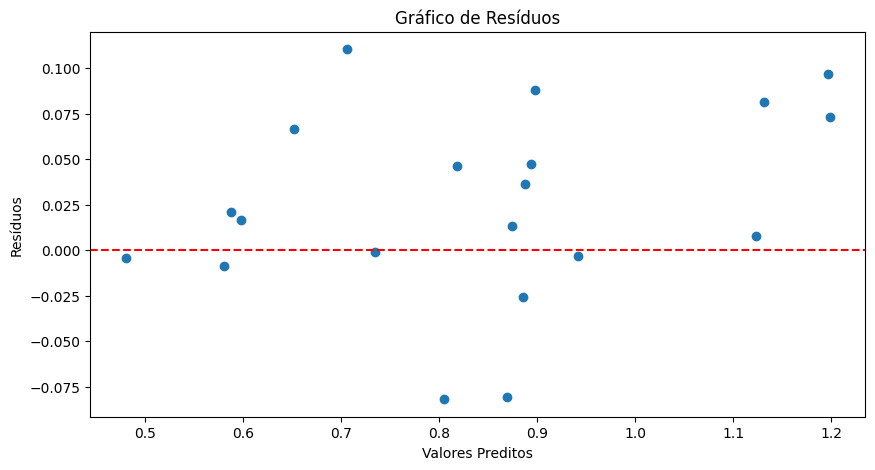

In [44]:
# Prevendo com os dados de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


# Gráfico de Resíduos
residuos = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

Análise
*   O MSE é uma medida que quantifica a média dos erros ao quadrado entre as previsões do modelo e os valores reais. Um MSE próximo de zero indica que o modelo tem um bom ajuste aos dados. Neste caso, o MSE é muito baixo, o que sugere que as previsões do modelo estão muito próximas dos valores reais.
*   O MAE mede a média dos erros absolutos entre as previsões do modelo e os valores reais. Assim como o MSE, um MAE menor indica um melhor desempenho do modelo.
*   O  R² (ou coeficiente de determinação) mede a proporção da variabilidade da variável dependente que pode ser explicada pelo modelo. O R² varia entre 0 e 1, onde 1 indica que o modelo explica 100% da variabilidade nos dados





# 6. Criando o pipeline

6.1 Determinando e rodando os algorítmos

In [45]:
# Função para converter numpy.ndarray de volta para DataFrame
def to_dataframe(X):
    return pd.DataFrame(X, columns=['Qtd de vasilhames P 13', 'Qtd P 45', 'Qtd P 20'])

In [46]:
# Definindo a pipeline com imputação e escalonamento
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores faltantes
    ('scaler', StandardScaler())  # Escalonamento dos dados
])

In [47]:
# Modelos e seus hiperparâmetros
modelos = {
    'Regressão Linear': {
        'modelo': LinearRegression(),
        'params': {}
    },
    'Random Forest': {
        'modelo': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'modelo': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'modelo': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    }
}

6.2 Mostrando e comparando os resultados


In [48]:
# Carregando os dados
data = pd.read_csv(url)

# Separando variáveis independentes e dependentes
X = data[['Qtd de vasilhames P 13', 'Qtd P 45', 'Qtd P 20']]
y = data['Intervalo de horas']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Armazenar resultados
resultados = []

# Testando os modelos
for nome, config in modelos_params.items():
    # Criando a pipeline com o pré-processamento e o modelo
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('modelo', config['modelo'])
    ])

    # Ajustando o modelo
    pipeline.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = pipeline.predict(X_test)

    # Avaliando o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenando os resultados
    resultados.append({'Modelo': nome, 'MSE': mse, 'R²': r2})

# Criando um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Exibindo os resultados
print(df_resultados)


              Modelo           MSE        R²
0   Regressão Linear  1.232595e-32  1.000000
1      Random Forest  3.303832e-03  0.934133
2                SVM  2.608739e-03  0.947991
3                KNN  2.628532e-03  0.947596
4  Árvore de Decisão  3.583700e-03  0.928553


Análise

*   Desta forma, vemos que o melhor modelo é o  de Random forest, pois possui um MSE mais baixo que os outros, como também um R² mais próximo do 1 que os outros modelos





# 7. Ler os dados da planilha de agendamento do dia

In [49]:
# Agora, vamos ler os dados de outra planilha para fazer as previsões
novos_dados = pd.read_excel('Agendamento.xlsx')

# Preencher valores vazios com zero
novos_dados[['Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20']] = novos_dados[['Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20']].fillna(0)

7.1 Fazendo a previsão

In [50]:
# Faça a previsão para cada linha e crie uma nova coluna com os resultados
novos_dados['TEMPO PERMANÊNCIA PREVISTO (horas)'] = [
    math.ceil(model.predict([[row['Qtd de vasilhames P 13'], row['Qtd  P 20'], row[ 'Qtd P 45']]])[0])
    for _, row in novos_dados.iterrows()
]

7.2 Salvando os dados na nova planilha

In [51]:
# Salve os resultados em uma nova planilha
novos_dados.to_excel('Agendamento com Previsão.xlsx', index=False)

print("Previsões concluídas e salvas em 'Agendamento com Previsão.xlsx'")

Previsões concluídas e salvas em 'Agendamento com Previsão.xlsx'


# 8. Conclusão
Assim, por meio deste projeto, é possível prever o tempo de permanência dos veículos na planta a partir de um algoritmo de regressão linear. Diversos modelos de regressão foram testados e comparados, e o escolhido foi o modelo de Random Forest, pois apresentou os melhores resultados em seus hiperparâmetros em comparação com os demais.